<a href="https://colab.research.google.com/github/Saiteja0909/Codes/blob/main/NDVI_colour_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rasterio

In [ ]:
pip install geopandas

In [ ]:
pip install earthpy

In [ ]:
import os
from glob import glob  # File manipulation
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Download data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [ ]:
rio.open("/content/LC08_L1TP_144052_20200228_20200228_01_RT.tiff")

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<open DatasetReader name='/content/LC08_L1TP_144052_20200228_20200228_01_RT.tiff' mode='r'>

with rio.open(landsat_post_fire_path) as src:
    landsat_post_fire = src.read()

In [ ]:
naip_csf_path = os.path.join("data", "cold-springs-fire", 
                             "naip", "m_3910505_nw_13_1_20150919", 
                             "crop", "m_3910505_nw_13_1_20150919_crop.tif")

with rio.open(naip_csf_path) as src:
    naip_csf = src.read()
    naip_csf_meta = src.meta

In [ ]:
naip_csf.shape

(4, 2312, 4377)

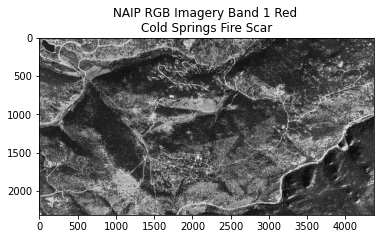

In [ ]:
fig, ax = plt.subplots()

ax.imshow(naip_csf[0], 
          cmap="Greys_r")

ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")

plt.show()

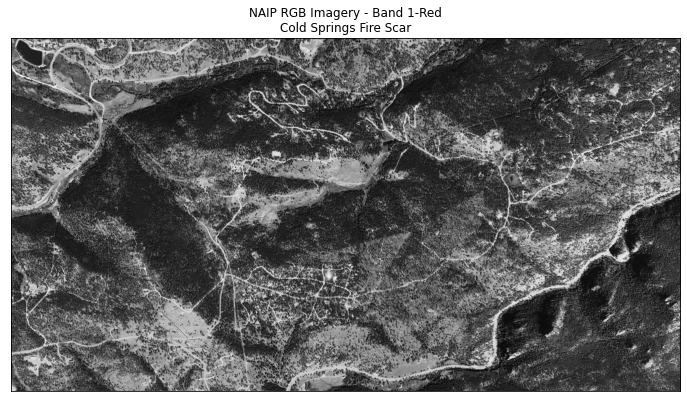

In [ ]:
ep.plot_bands(naip_csf[0],
              title="NAIP RGB Imagery - Band 1-Red\nCold Springs Fire Scar",
              cbar=False)
plt.show()

In [ ]:
naip_csf_meta

{'count': 4,
 'crs': CRS.from_wkt('PROJCS["UTM Zone 13, Northern Hemisphere",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'),
 'driver': 'GTiff',
 'dtype': 'int16',
 'height': 2312,
 'nodata': -32768.0,
 'transform': Affine(1.0, 0.0, 457163.0,
       0.0, -1.0, 4426952.0),
 'width': 4377}

In [ ]:
# View min and max value
print(naip_csf.min())
print(naip_csf.max())

17
242


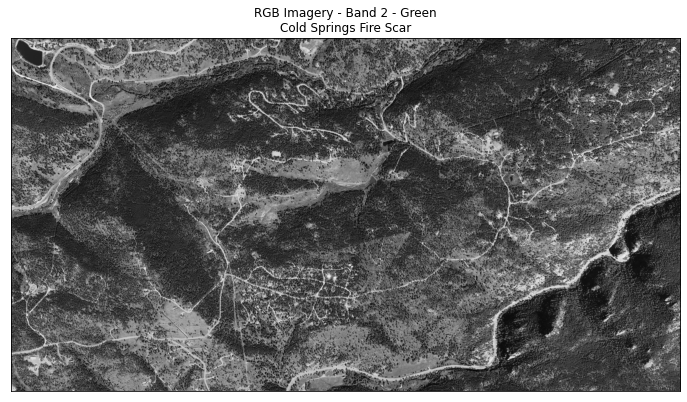

In [ ]:
# Plot band 2 - green
ep.plot_bands(naip_csf[1],
              title="RGB Imagery - Band 2 - Green\nCold Springs Fire Scar",
              cbar=False)
plt.show()

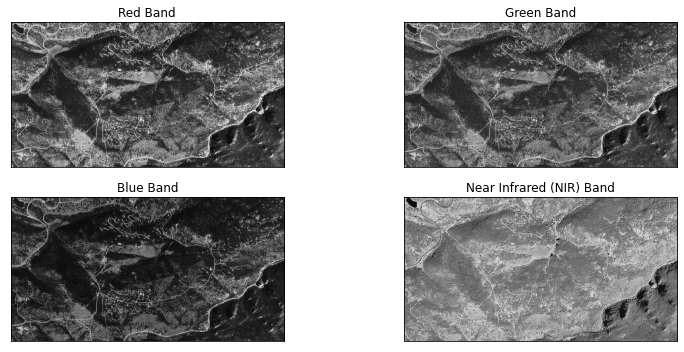

In [ ]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

# Plot all bands using the earthpy function
ep.plot_bands(naip_csf, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False)
plt.show()

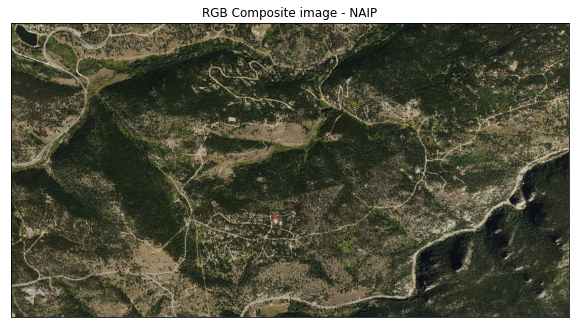

In [ ]:
ep.plot_rgb(naip_csf,
            rgb=[0, 1, 2],
            title="RGB Composite image - NAIP")
plt.show()

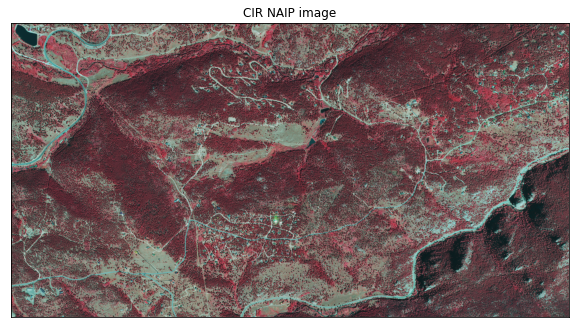

In [ ]:
ep.plot_rgb(naip_csf, title="CIR NAIP image",
            rgb=[3, 0, 1],
            figsize=(10, 8))
plt.show()

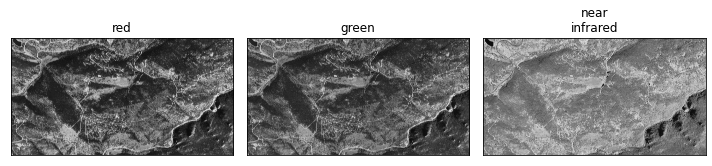

In [ ]:
titles = ['red', 'green', 'near\ninfrared']
ep.plot_bands(naip_csf[[0, 1, 3]],
              figsize=(10,  7),
              title=titles,
              cbar=False)
plt.show()

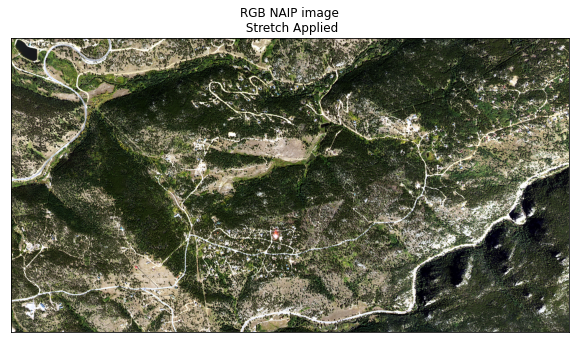

In [ ]:
band_indices = [0, 1, 2]

# Apply stretch using the earthpy plot_rgb function
ep.plot_rgb(naip_csf,
            rgb=band_indices,
            title="RGB NAIP image\n Stretch Applied",
            figsize=(10, 8),
            stretch=True)
plt.show()

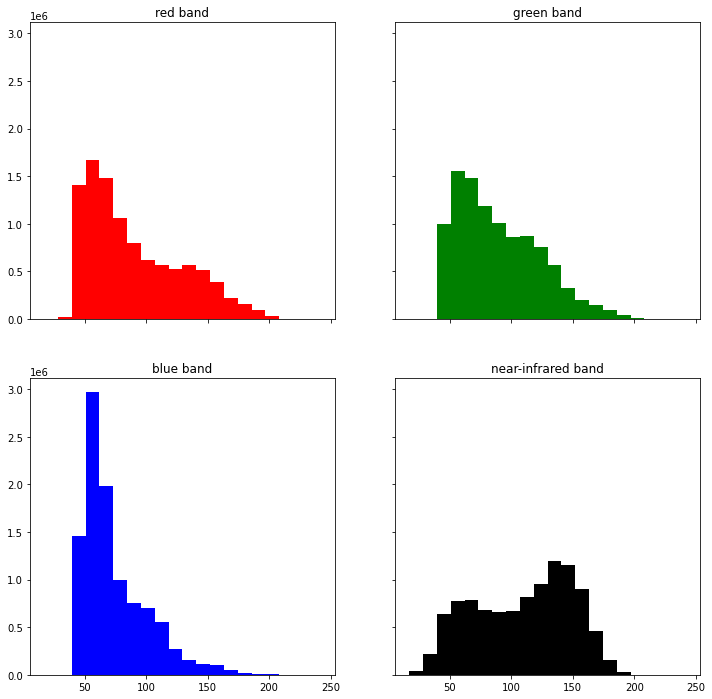

In [ ]:
# Create a colors and titles list to use in the histogram, then plot
colors = ['r', 'g', 'b', 'k']
titles = ['red band', 'green band', 'blue band', 'near-infrared band']

ep.hist(naip_csf, 
        colors=colors, 
        title=titles, 
        cols=2)

plt.show()